In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [10]:
project_directory = '/content/drive/MyDrive/Project 103/C2C user Dataset/'

In [11]:
import pandas as pd

In [12]:
Data=pd.read_csv(project_directory+'/C2C Store User data.csv')

In [13]:
Data

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,-7.279640e+18,user,Etats-Unis,en,3,8,0,0,0,0.0,...,mrs,False,False,False,True,709,3205,106.83,8.9,us
1,-1.456010e+18,user,Allemagne,de,3,8,0,0,0,0.0,...,mrs,False,False,False,True,709,3205,106.83,8.9,de
2,9.006280e+18,user,Suède,en,3,8,0,0,0,0.0,...,mr,True,False,True,True,689,3205,106.83,8.9,se
3,-7.154630e+18,user,Turquie,en,3,8,0,0,0,0.0,...,mrs,False,False,False,True,709,3205,106.83,8.9,tr
4,2.858300e+18,user,France,en,3,8,0,0,0,0.0,...,mr,True,False,True,True,709,3205,106.83,8.9,fr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98908,-5.324380e+18,user,Etats-Unis,fr,3,8,0,0,0,0.0,...,mr,False,False,False,True,708,3204,106.80,8.9,us
98909,-5.607670e+18,user,France,fr,3,8,0,0,0,0.0,...,mr,True,False,True,True,695,3204,106.80,8.9,fr
98910,3.506300e+17,user,Belgique,en,3,8,0,0,0,0.0,...,mr,True,True,False,True,520,3204,106.80,8.9,be
98911,2.006580e+18,user,Italie,it,3,8,0,0,0,0.0,...,mrs,False,False,False,True,267,3204,106.80,8.9,it


In [14]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98913 entries, 0 to 98912
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   identifierHash       98913 non-null  float64
 1   type                 98913 non-null  object 
 2   country              98913 non-null  object 
 3   language             98913 non-null  object 
 4   socialNbFollowers    98913 non-null  int64  
 5   socialNbFollows      98913 non-null  int64  
 6   socialProductsLiked  98913 non-null  int64  
 7   productsListed       98913 non-null  int64  
 8   productsSold         98913 non-null  int64  
 9   productsPassRate     98913 non-null  float64
 10  productsWished       98913 non-null  int64  
 11  productsBought       98913 non-null  int64  
 12  gender               98913 non-null  object 
 13  civilityGenderId     98913 non-null  int64  
 14  civilityTitle        98913 non-null  object 
 15  hasAnyApp            98913 non-null 

In [15]:
Data.shape

(98913, 24)

# Getting user count of each country to understand their interaction with store

In [16]:
# Count the occurrences of each country code
country_counts = Data['countryCode'].value_counts().reset_index()


In [17]:
country_counts.columns = ['countryCode', 'count']

<Axes: xlabel='countryCode', ylabel='count'>

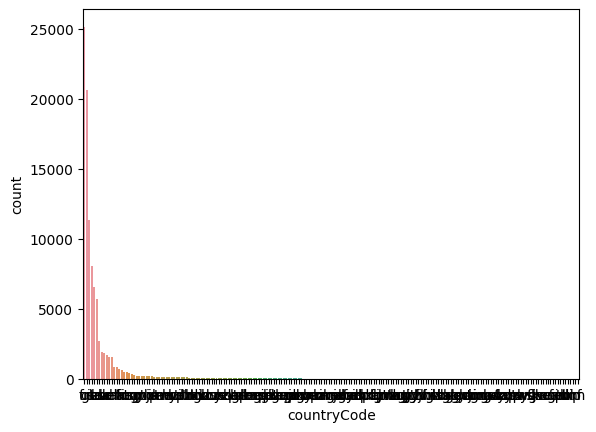

In [18]:
sns.barplot(x='countryCode', y='count', data=country_counts)



# Finding highest interacting cuntries 

In [19]:
country_counts_top15 = country_counts.nlargest(15, 'count')

In [20]:
sns.set(rc={'figure.figsize':(10,6)})

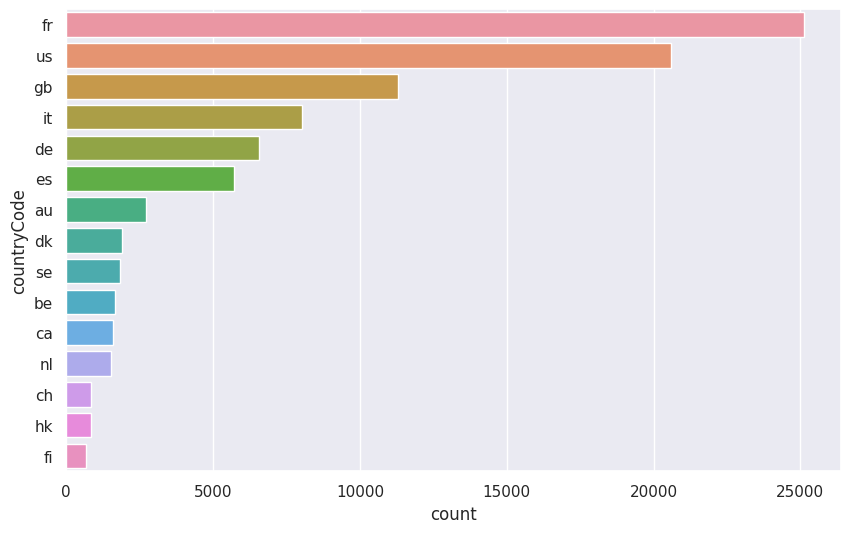

In [21]:
ax = sns.barplot(x='count', y='countryCode', data=country_counts_top15)


# Top Buyers and sellers analysis

In [41]:
country_product_counts = Data.groupby('countryCode')['productsBought'].sum().reset_index()

In [42]:
country_product_matrix = country_product_counts.pivot(index='countryCode', columns='productsBought', values='productsBought')

In [43]:
top_countries = country_product_counts.nlargest(15, 'productsBought')['countryCode']


In [44]:
country_product_matrix_top15 = country_product_matrix.loc[top_countries]

In [45]:
sns.set(rc={'figure.figsize':(10,7)})

In [46]:
annot_font = {'color': 'black'}

<Axes: xlabel='productsBought', ylabel='countryCode'>

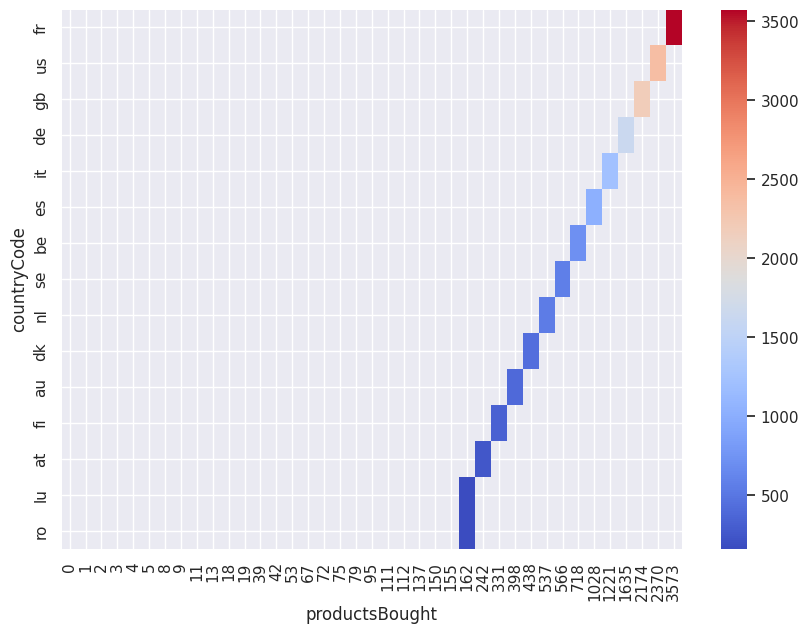

In [49]:
sns.heatmap(country_product_matrix_top15, cmap='coolwarm', color='Black')

# Count the number of purchases by Products Sold

In [29]:
grouped_data = Data.groupby('countryCode').sum().reset_index()

In [30]:
top_15_data = grouped_data.sort_values(by='productsSold', ascending=False).head(15)

Text(0, 0.5, 'Products sold')

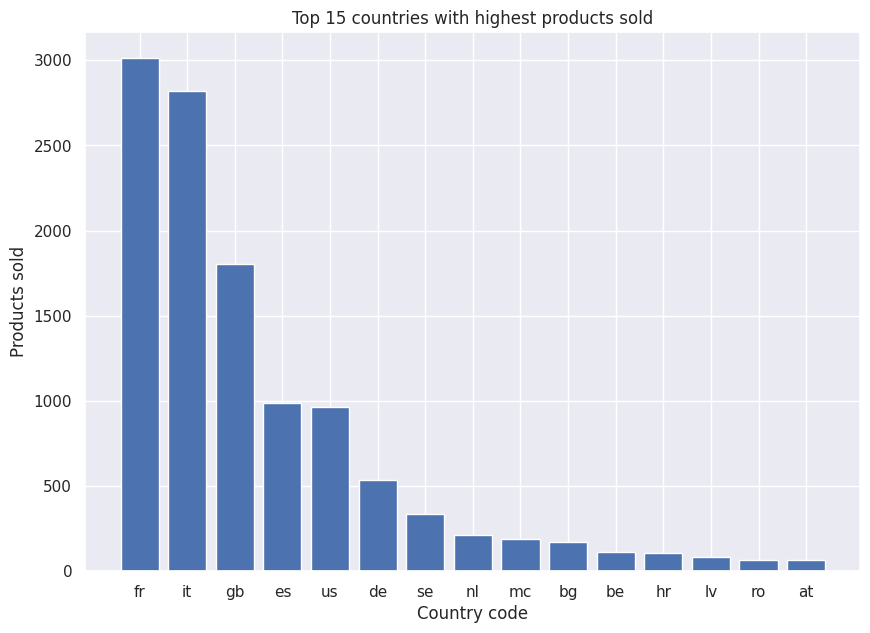

In [31]:
plt.bar(top_15_data['countryCode'], top_15_data['productsSold'])
plt.title('Top 15 countries with highest products sold')
plt.xlabel('Country code')
plt.ylabel('Products sold')

# Behavior of different genders in store

In [32]:
gender_counts = Data.groupby('gender')['productsBought'].sum().reset_index()

In [33]:
sns.set(rc={'figure.figsize':(10,7)})

<Axes: xlabel='gender', ylabel='productsBought'>

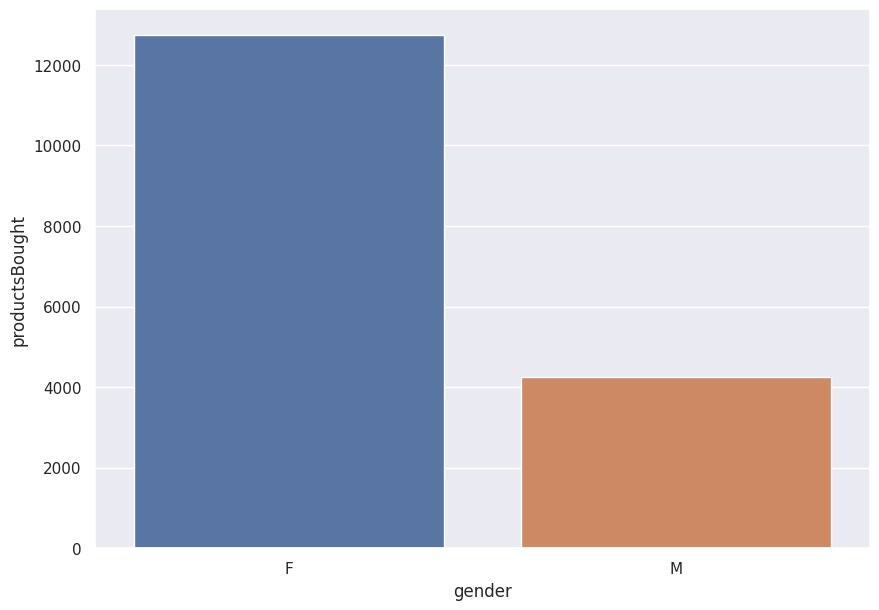

In [34]:
sns.barplot(x='gender', y='productsBought', data=gender_counts)

In [35]:
sellers_gender_counts = Data.groupby('gender')['productsSold'].sum().reset_index()

([<matplotlib.patches.Wedge at 0x7f81898fc970>,
 [Text(-0.8425873473538977, 0.7071397047819633, 'F'),
  Text(0.8425873804574954, -0.7071396653376022, 'M')],
 [Text(-0.4595930985566714, 0.38571256624470723, '77.8%'),
  Text(0.45959311661317925, -0.3857125447296012, '22.2%')])

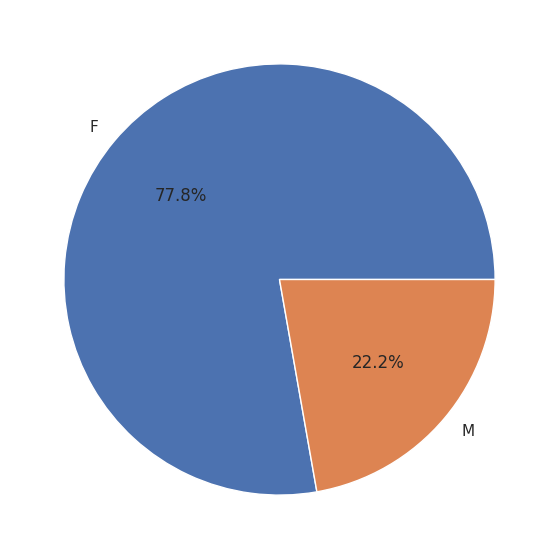

In [36]:
plt.pie(sellers_gender_counts['productsSold'], labels=gender_counts['gender'], autopct='%1.1f%%')

# social media activit of users

<Axes: xlabel='socialNbFollowers', ylabel='productsSold'>

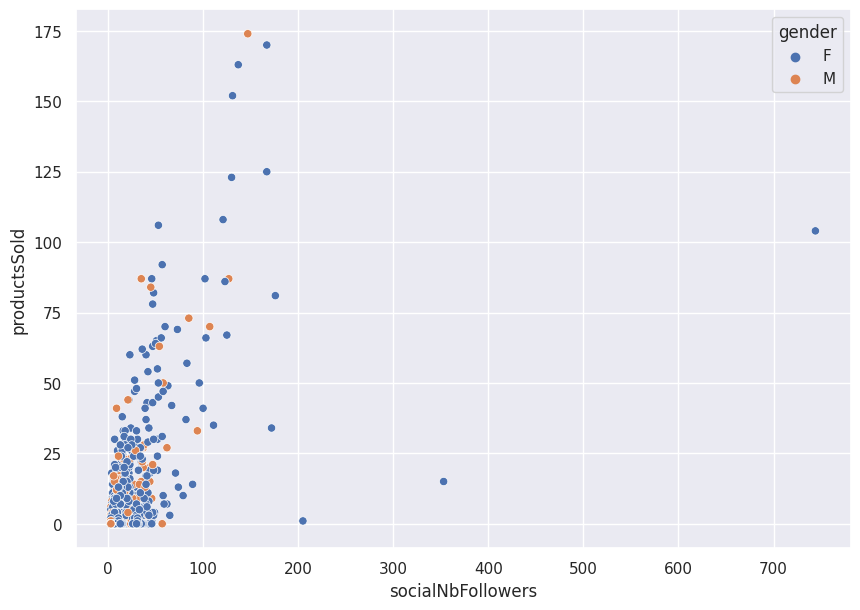

In [37]:
sns.scatterplot(data=Data, x='socialNbFollowers', y='productsSold', hue='gender')

<Axes: xlabel='socialNbFollows', ylabel='productsBought'>

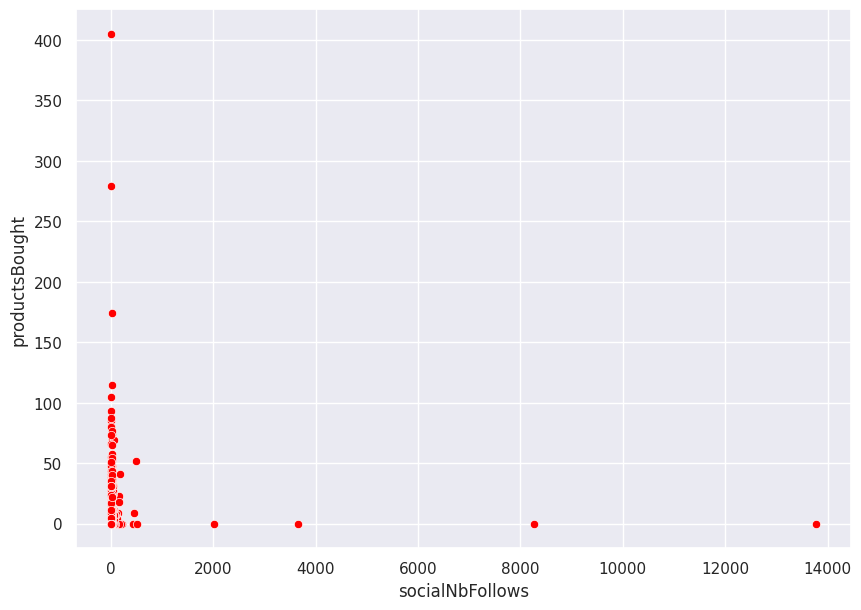

In [38]:
sns.scatterplot(data=Data, x='socialNbFollows', y='productsBought', color='red')


<Axes: xlabel='socialNbFollows', ylabel='productsBought'>

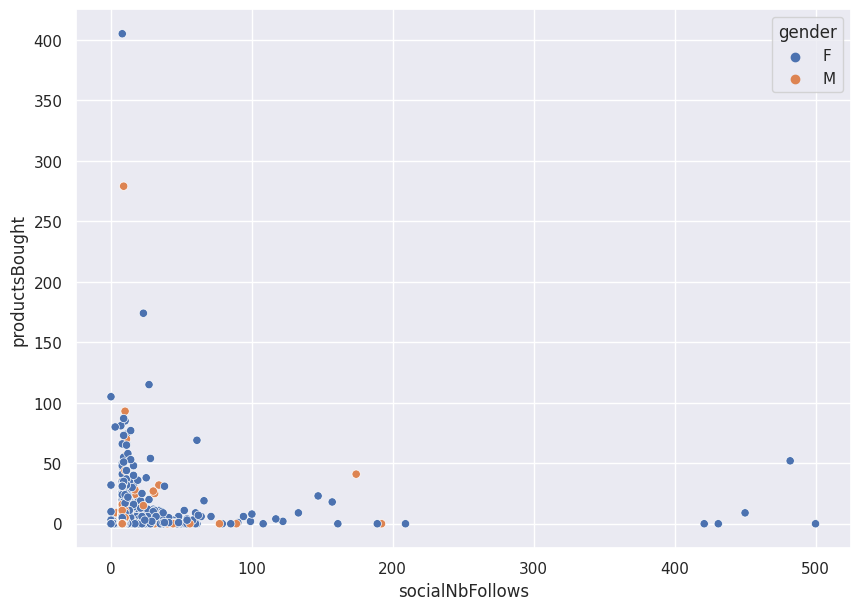

In [39]:
#Getting rid of extremes
data_filtered = Data[Data['socialNbFollows'] < 2000]
sns.scatterplot(data=data_filtered, x='socialNbFollows', y='productsBought', hue='gender')

<Axes: xlabel='socialNbFollows', ylabel='productsSold'>

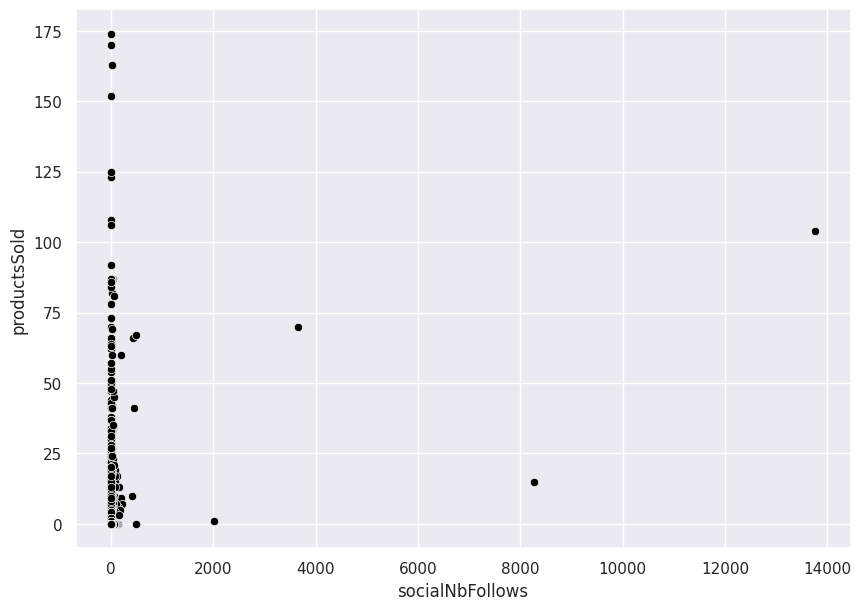

In [40]:
#looks like sellers also follow high number of people to sell their prducts
sns.scatterplot(data=Data, x='socialNbFollows', y='productsSold', color='black')

# if having an app makes difference 